In [9]:
import numpy as np
from scipy.stats import norm,gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
plt.style.use("ggplot")
np.random.seed(123)

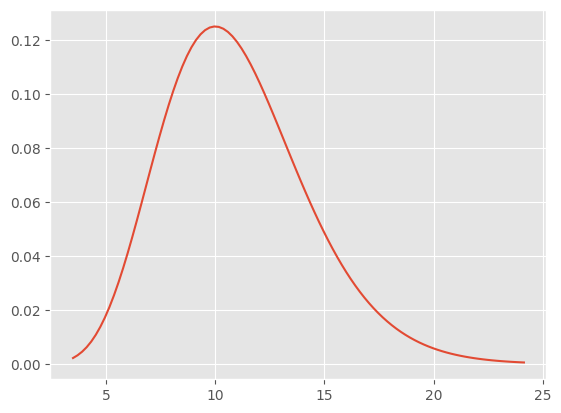

In [11]:
k=11
lam=1
x=np.linspace(gamma.ppf(0.001,k),gamma.ppf(0.999,k),100)
plt.plot(x,gamma.pdf(x,k,scale=1/lam),label="gamma pdf")

In [12]:
f= lambda x,lam,k : -lam+(k-1)/x

In [13]:
def leap_flog(q,p,eps,lam,k,f):
    p_new =  p+.5*eps *f(q,lam,k)
    q_new = q+eps*p_new
    p_new = p_new+.5*eps*f(q_new,lam,k)
    q,p = q_new,p_new
    return q,p

/tmp/ipykernel_1216/1799444161.py:25: RuntimeWarning: divide by zero encountered in log
  CS=plt.contour(X,Y,.5 * Y**2-(k-1)*np.log(X)+lam*X,levels=[-12,-10,-5,0])


accept ratio: 1.0


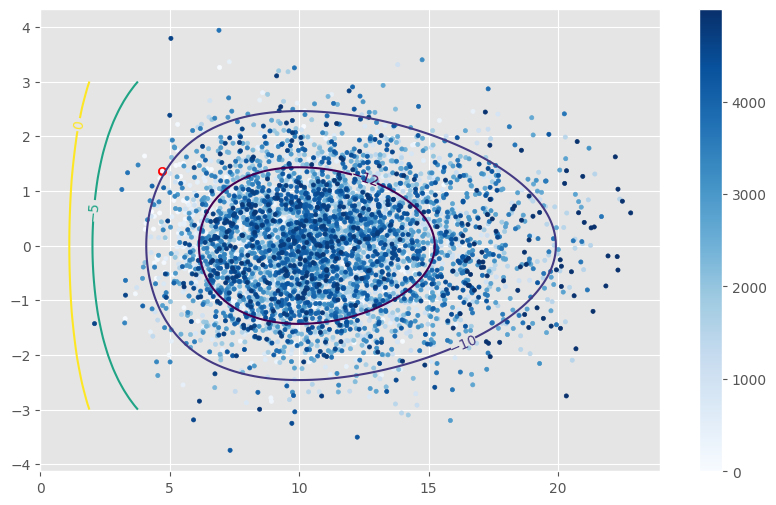

In [14]:
eps=1e-2
q,p = 4.0,0.0
L=100
NMCS=10000
warmup=5000
lf_arr=np.zeros([NMCS,2])
n_accept=0
for mcs in range(NMCS):
    hamiltornian_c=.5*p**2+lam*q-(k-1)*np.log(q)
    q_c,p_c=q,p
    for i in range(L):
        q_c,p_c=leap_flog(q_c,p_c,eps,lam,k,f)
    hamiltornian_new=.5*p_c**2+lam*q_c-(k-1)*np.log(q_c)
    if np.random.rand()<np.exp(hamiltornian_c-hamiltornian_new):
        q,p=q_c,p_c
        n_accept+=1
        hamiltornian_c=hamiltornian_new
    lf_arr[mcs,0]=q
    lf_arr[mcs,1]=p
    p=norm.rvs()
df=pd.DataFrame(lf_arr[:warmup],columns=["q","p"])
plt.figure(figsize=(10,6))
x,y = np.linspace(0,20,100),np.linspace(-3,3,100)
X,Y=np.meshgrid(x,y)
CS=plt.contour(X,Y,.5 * Y**2-(k-1)*np.log(X)+lam*X,levels=[-12,-10,-5,0])
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(df["q"][0],df["p"][0],c="r",label="start")
plt.scatter(df["q"],df["p"],c=df.index,marker=".",cmap="Blues")
plt.colorbar()
print("accept ratio:",n_accept/NMCS)

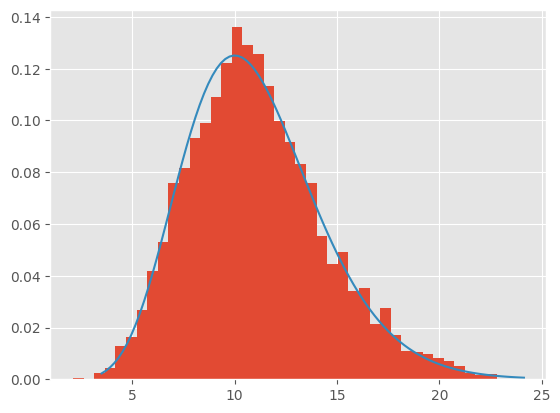

In [15]:
df["q"].hist(density=True,bins=40)
x=np.linspace(gamma.ppf(0.001,k),gamma.ppf(0.999,k),100)
plt.plot(x,gamma.pdf(x,k,scale=1/lam),label="gamma pdf")